In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import urllib

from rayopt import *

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


/home/rj/work/nist/pyrayopt/rayopt/elements.py:126: RuntimeWarning: invalid value encountered in multiply
  self._offset = o = d*u
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/elements.py:423: RuntimeWarning: invalid value encountered in sqrt
  g = np.sqrt(np.square(d) - e*f)


FCUR not handled 0 2 0 0 0 0 3.0 1.0E+5 0 0
AXCL not handled 1 3 0 0 0 0 0 1.0E+2 0 0
ASTI not handled 0 2 5.0E-1 5.0E-1 0 0 0 1.0E+1 0 0
LONA not handled 0 0 0 0 0 0 2.0E-2 1.0E+3 0 0
TTHI not handled 2 16 0 0 0 0 2.01E+1 0 0 0
OPGT not handled 5 0 0 0 0 0 1.9E+1 1 0 0
OPLT not handled 5 0 0 0 0 0 2.25E+1 1 0 0
DIST not handled 0 2 0 0 0 0 -5. 0 0 0
OPGT not handled 8 0 0 0 0 0 -1.2E+1 1 0 0
OPLT not handled 8 0 0 0 0 0 0 1 0 0
System: Elphel 1/2.5", f=4.5mm, f/1.8
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 19 dia at 5
 Pupil: 2.5 dia at 12.2
 Semi-Angle: 38
Image:
 Index: 1
 Entrance: 8 dia at 0.0296
 Pupil: 5.76 dia at 10.4
 Radius: 4
 NA: 0.267
Stop: 9
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf     36.417         basic/air   1.000     nan     nan
 1 S          5       44.2         19           LASF14A   1.822     nan     nan
 2 S          2      246.7         19         basic/air

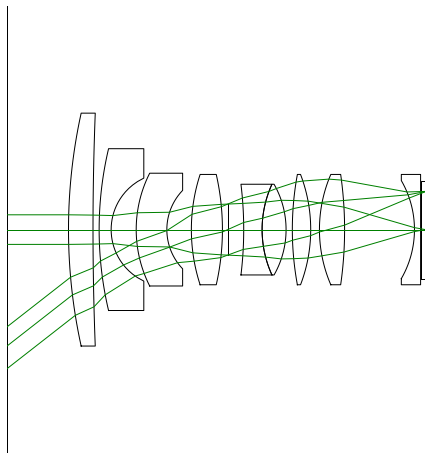

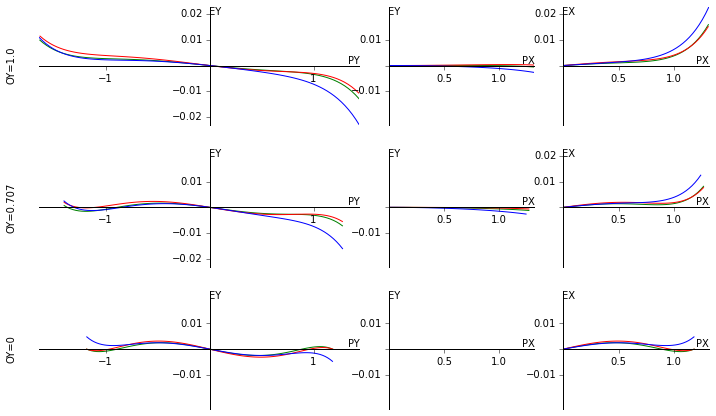

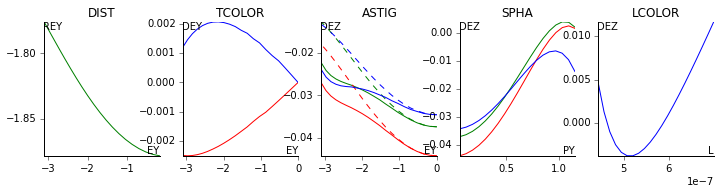

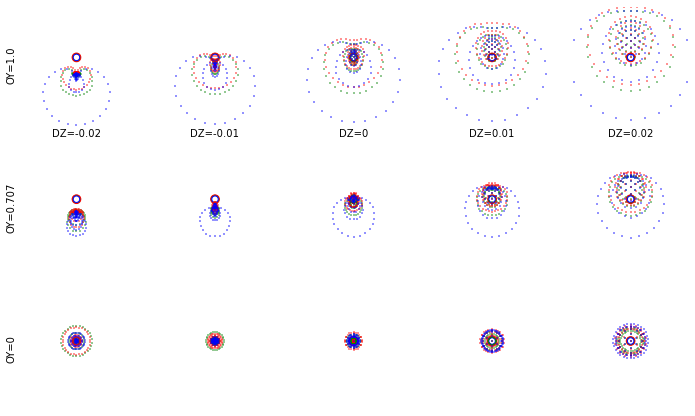

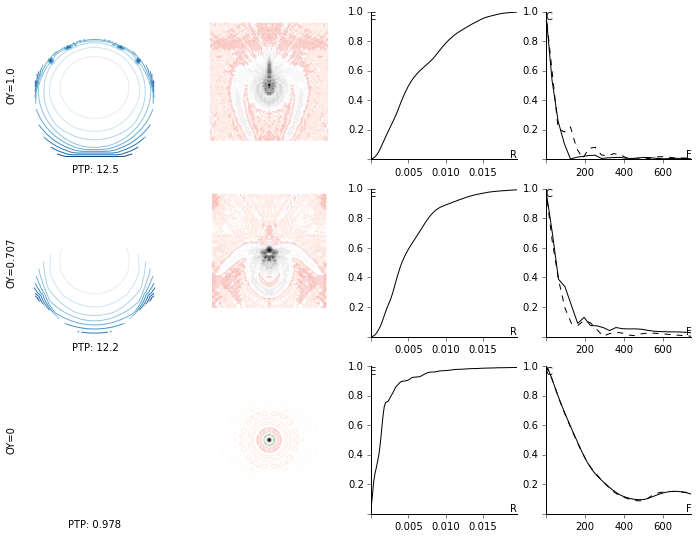

In [2]:
f = "https://raw.githubusercontent.com/Elphel/elens/master/ofh_v2_utf16le.zmx"
s = zmx_to_system(urllib.request.urlopen(f).read().decode("utf16"))

s.object.angle = np.deg2rad(38)
del s[:2]
s[0].distance = 0
s[1].distance = 5
s.description = "Elphel 1/2.5\", f=4.5mm, f/1.8"
s.stop = 9
# s[-1].direction = 0, 0, 1.
s.update()

a = Analysis(s, resize_full=False, resize=False)

/home/rj/work/nist/pyrayopt/rayopt/elements.py:126: RuntimeWarning: invalid value encountered in multiply
  self._offset = o = d*u
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2


FNO not handled ['2.0']
ANG not handled ['38.0']
DRW not handled ['ON']
DRW not handled ['ON']
CBK not handled ['1']
OPDF not handled ['4.2759729884e-12']
OPOC not handled ['"update_operand"']
RST not handled ['NEW']
F not handled ['1', '0.0', '0.0', '0.0', '0.0', '0.0', '-1.0', '1.0', '-1.0', '1.0', '1.0', '0', '0']
F not handled ['2', '0.7', '0.0', '0.0', '0.0', '0.0', '-1.0', '1.0', '-1.0', '1.0', '1.0', '0', '0']
F not handled ['3', '1.0', '0.0', '0.0', '0.0', '0.0', '-1.0', '1.0', '-1.0', '1.0', '1.0', '0', '0']
OPE not handled ['NEW']
O not handled ['1', '"OCM0"', '129.3413840182101', '"MAIN_ERR"']
O not handled ['2', '"OCM1"', '23.5795144344184', '"EFL"']
O not handled ['3', '"OCM2"', '0.0', '"Distortion"']
O not handled ['4', '"OCM3"', '30.9322600342348', '"At_w1_0.0"']
O not handled ['5', '"OCM4"', '24.9909375903941', '"At_w1_0.3"']
O not handled ['6', '"OCM5"', '32.8483352886156', '"At_w1_0.5"']
O not handled ['7', '"OCM6"', '32.2384469131098', '"At_w1_0.6"']
O not handled ['

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h


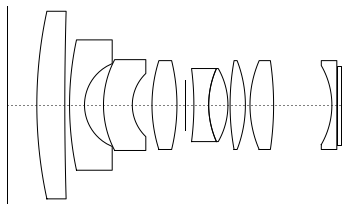

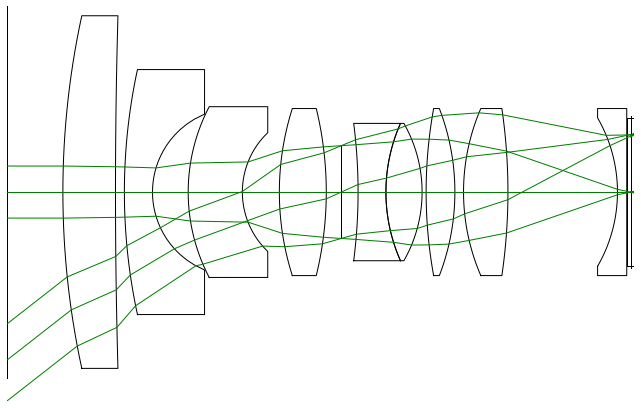

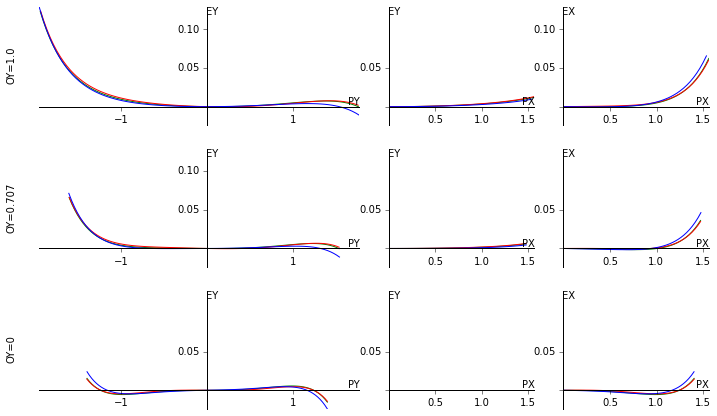

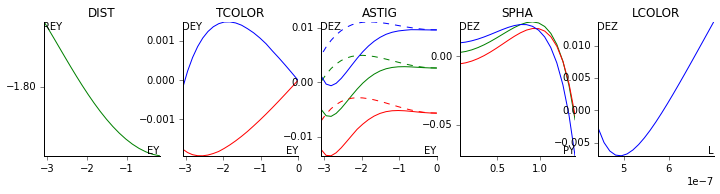

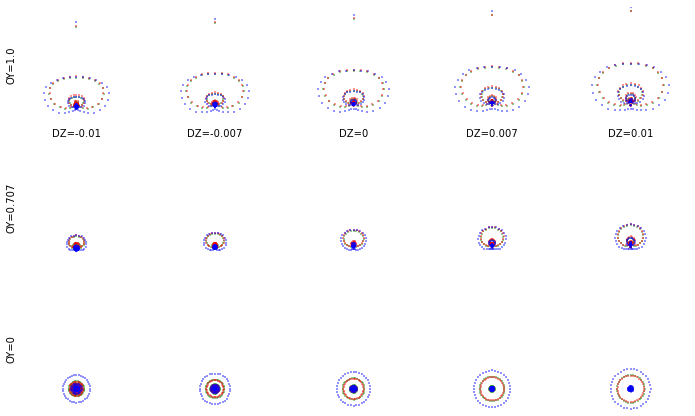

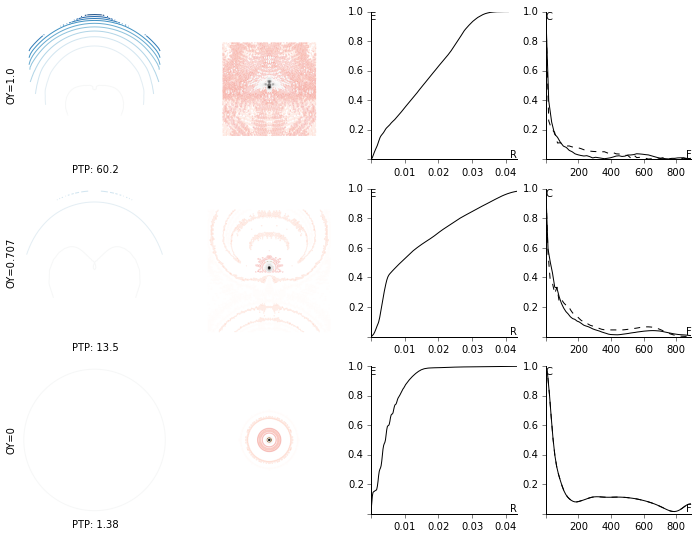

In [3]:
import io
f = "https://raw.githubusercontent.com/Elphel/elens/master/elphel_F2.0_4.5.len"
s = len_to_system(io.StringIO(urllib.request.urlopen(f).read().decode("utf8")))
s.object.angle = np.deg2rad(38)
s[0].radius = 10.
s[0].material = air
s[1].distance = 3.
del s[-2:]
s.stop = 9
s[s.stop].radius = 2.5
s[-3].distance = 0
s[-1].radius = 4
s[-5].distance += .3
s.update()
print(s)
s.plot(plt.gca())
Analysis(s)

In [4]:
print(system_to_yaml(s))

elements:
- {material: basic/air, radius: 10.0}
- {curvature: 0.022314307720588213, distance: 3.0, material: LASF14A, radius: 9.5}
- {curvature: 0.0029395763498377657, distance: 2.8342502197064, material: basic/air,
  radius: 9.5}
- {curvature: 0.03197146653395714, distance: 0.479338086425, material: SK16, radius: 6.6}
- {curvature: 0.21995534850141707, distance: 1.514547251578, material: basic/air,
  radius: 4.2}
- {curvature: 0.10089139243052675, distance: 1.9234731507825, material: BAF51, radius: 4.6}
- {curvature: 0.2259168910143031, distance: 2.9182781603707, material: basic/air,
  radius: 3.2}
- {curvature: 0.06738849776197436, distance: 1.9933962755638, material: SF57, radius: 4.5}
- {curvature: -0.05253049347569311, distance: 2.5291694371013, material: basic/air,
  radius: 4.5}
- {distance: 0.8092865346866, material: basic/air, radius: 2.5}
- {curvature: -0.034370633934576546, distance: 0.9039832952238, material: SF58, radius: 3.7}
- {curvature: 0.10963300064507663, distance: 1